### Import Libraries

In [1]:
import pandas as pd

### Settings

In [2]:
# Dataframe settings
pd.set_option('display.max_columns', 500, 'display.max_rows', 500, 'display.float_format', '{:.2f}'.format)


# Runtime
useCUDA = False

### Import data

In [3]:
df_brancher = pd.read_csv("Data/arbejdsmarkedsanalyse_brancher.csv", sep=';', decimal=",", encoding='iso8859_10')
df_personer = pd.read_csv("Data/arbejdsmarkedsanalyse_koen_alder.csv", sep=';', decimal=",", encoding='iso8859_10')

### Descriptive Statistics

#### Brancher 

In [4]:
df_brancher.head(3)

,Field Values Index,Ordforklaring,Akse,Farveskala,Field Values Index (Fixed),Navigation - Arbejdsmiljøprofiler,Score (Indekseret score) (gennemsnit),Score (Indekseret score) (gennemsnit) (label),Score (Total) (Fixed),Gennemsnit,Score (Indekseret score),Score (Total),Antpct,Antpers,Group,Hoej Score Godt,Kategori10,Kategori11,Kategori12,Kategori13,Kategori14,Kategori15,Kategori1,Kategori2,Kategori3,Kategori4,Kategori5,Kategori6,Kategori7,Kategori8,Kategori9,Main Group,Score,Field Values,Mean,Question Label,Sluttekst,Spm Formulering,Topic Label,Type,Year
0,49.82,"Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,-5.06,54.88,Arbejdsmiljøprofiler,52.18,2.61,-2.61,nan,53.17,nan,nan,224,Bibliotekarer og beskæftigede med kultur,0,nan,NaN,nan,nan,nan,nan,1. Altid,2. Ofte,3. Sommetider,4. Sjældent,5. Aldrig,NaN,nan,nan,nan,Job,2.66,-2.66,2.66,Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige ...,"Hvor ofte oplever du, at du har nok tid til di...",Kvantitative krav og grænseløshed,kont,2018
1,59.25,"Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,4.36,54.88,Arbejdsmiljøprofiler,52.18,2.61,-2.61,nan,51.32,nan,nan,388,Bogholdere,0,nan,NaN,nan,nan,nan,nan,1. Altid,2. Ofte,3. Sommetider,4. Sjældent,5. Aldrig,NaN,nan,nan,nan,Job,2.57,-2.57,2.57,Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige ...,"Hvor ofte oplever du, at du har nok tid til di...",Kvantitative krav og grænseløshed,kont,2018
2,89.95,"Spørgsmål: Hvor ofte oplever du, at du har nok...",Score,35.07,54.88,Arbejdsmiljøprofiler,52.18,2.61,-2.61,nan,45.30,nan,nan,189,"Brandmænd, reddere og sikkerhedsvagter",0,nan,NaN,nan,nan,nan,nan,1. Altid,2. Ofte,3. Sommetider,4. Sjældent,5. Aldrig,NaN,nan,nan,nan,Job,2.26,-2.26,2.26,Ikke nok tid til arbejdsopgaver,I resultaterne præsenteres den gennemsnitlige ...,"Hvor ofte oplever du, at du har nok tid til di...",Kvantitative krav og grænseløshed,kont,2018


In [19]:
# Get descriptive statistics
#df_brancher.describe(include='all')

In [18]:
# Get general info about the dataframe
#df_brancher.info()

In [16]:
#df_brancher.columns

In [17]:
#df_brancher.Group.unique()

In [9]:
df_brancher[df_brancher.Group == "Undervisere ved erhvervsskoler"]["Score (Indekseret score)"].mean()

45.22989871428703

### Finding 1

In [10]:
df_brancher.groupby(["Group"])["Score (Indekseret score)"].mean().sort_values(ascending=False)

Group
Frisører og kosmetologer                         54.29
Slagtere og bagere                               52.89
Gartnere og landmænd                             51.85
Murere, VVSīere m.fl.                            51.55
Malere                                           51.40
Tømrere og snedkere                              50.70
Nærings- og nydelsesmiddelindustrimedarbejdere   50.07
Produktionsmedarbejdere                          50.00
SOSUīer                                          49.95
Servicefag i øvrigt                              49.76
Køkkenmedhjælpere                                49.66
Farmaceuter, tandlæger og dyrlæger               49.61
Bygge- og anlægsarbejdere                        49.61
Smede                                            49.60
Mekanikere                                       49.48
Kokke og tjenere                                 49.46
Montører                                         49.33
Samfundsvidenskabelige akademikere               49.30
Mask

### Finding 2

In [11]:
# Create dictionary 
isPsychological = dict((element,0) for element in df_brancher["Topic Label"].unique())

# Manually label psychological types
isPsychological["Angstsymptomer"] = 1
isPsychological["Arbejdsevne"] = "Return"
isPsychological["Arbejdspladsens prioritering af arbejdsmiljø"] = "Undefineable"
isPsychological["Arbejdsrelateret sygdom"] = "Undefineable"
isPsychological["Arbejdstid"] = "Undefineable"
isPsychological["Depressive symptomer"] = 1
isPsychological["Egen indsats for arbejdsmiljø"] = 1
isPsychological["Engagement og mening i arbejdet"] = 1
isPsychological["Følelsesmæssige krav"] = 1
isPsychological["Helbred"] = "Undefineable"
isPsychological["Indflydelse"] = "Undefineable"
isPsychological["Kollegial støtte og samarbejde"] = 1
isPsychological["Jobusikkerhed"] = 1
isPsychological["Kollegial anerkendelse"] = 1
isPsychological["Konflikter mellem arbejde og privatliv"] = 1
isPsychological["Kvantitative krav og grænseløshed"] = 1
isPsychological["Ledelseskvalitet"] = 1
isPsychological["Mentalt helbred"] = 1
isPsychological["Negative oplevelser"] = 1
isPsychological["Nyansatte"] = "Undefineable"
isPsychological["Retfærdighed"] = 1
isPsychological["Rolleklarhed"] = 1
isPsychological["Rummelighed"] = 1
isPsychological["Sundhedsfremmetilbud"] = "Undefineable"
isPsychological["Træthed og søvnproblemer"] = 1
isPsychological["Uoverskuelighed og stress"] = 1
isPsychological["Vold og trusler"] = "Return"
isPsychological

{'Kvantitative krav og grænseløshed': 1,
 'Følelsesmæssige krav': 1,
 'Konflikter mellem arbejde og privatliv': 1,
 'Træthed og søvnproblemer': 1,
 'Jobusikkerhed': 1,
 'Ledelseskvalitet': 1,
 'Rolleklarhed': 1,
 'Retfærdighed': 1,
 'Rummelighed': 1,
 'Indflydelse': 'Undefineable',
 'Kollegial støtte og samarbejde': 1,
 'Kollegial anerkendelse': 1,
 'Egen indsats for arbejdsmiljø': 1,
 'Arbejdsevne': 'Return',
 'Helbred': 'Undefineable',
 'Engagement og mening i arbejdet': 1,
 'Sikkerhed på arbejdspladsen': 0,
 'Arbejdspladsens prioritering af arbejdsmiljø': 'Undefineable',
 'Arbejdsrelateret sygdom': 'Undefineable',
 'Smerter': 0,
 'Arbejdstid': 'Undefineable',
 'Negative oplevelser': 1,
 'Vold og trusler': 'Return',
 'Støj og vibrationer': 0,
 'Støv, dampe og gasser': 0,
 'Belastende arbejdsstillinger': 0,
 'Hudpåvirkning og hudproblemer': 0,
 'Løft, skub eller træk af byrder': 0,
 'Uoverskuelighed og stress': 1,
 'Ulykker': 0,
 'Gående, stående og siddende arbejde': 0,
 'Nyansatte':

In [12]:
# Insert values into dataframe
df_brancher["isPsychological"] = 0

for key in isPsychological:
    df_brancher.loc[df_brancher["Topic Label"] == key, "isPsychological"] = isPsychological[key]
    
# Manually insert values for special cases
df_brancher.loc[df_brancher["Question Label"] == "Fysisk arbejdsevne", "isPsychological"] = 0
df_brancher.loc[df_brancher["Question Label"] == "Arbejdsevne", "isPsychological"] = "Undefineable"
df_brancher.loc[df_brancher["Question Label"] == "Psykisk arbejdsevne", "isPsychological"] = 1
df_brancher.loc[df_brancher["Question Label"] == "Fysisk vold", "isPsychological"] = 0
df_brancher.loc[df_brancher["Question Label"] == "Trusler", "isPsychological"] = 1

In [14]:
# Udregn ny score
dc = df_brancher.groupby(["Group", "isPsychological"])["Score (Indekseret score)"].mean().unstack()

# Rename columns
dc = dc.rename(columns={0: "Fysical", 1: "Psychological"})

# Add count
dc['Count'] = df_brancher.groupby(["Group"])["Antpers"].sum()

dc.drop(columns=['Undefineable'])

isPsychological,Fysical,Psychological,Count
Group,,,
Bibliotekarer og beskæftigede med kultur,28.31,58.48,23205
Bogholdere,29.25,57.61,37783
"Brandmænd, reddere og sikkerhedsvagter",32.89,57.03,19886
Bude og kurerer,36.12,56.33,19300
"Bus- og taxachauffører, lokoførere m.fl.",30.51,55.85,29561
Butikssælgere,31.43,57.79,100939
Bygge- og anlægsarbejdere,40.68,57.36,28411
Dagplejere og børneomsorgsbeskæftigede,35.84,57.68,30737
"Direktions-, læge-, og advokatsekretærer",26.73,57.88,66126


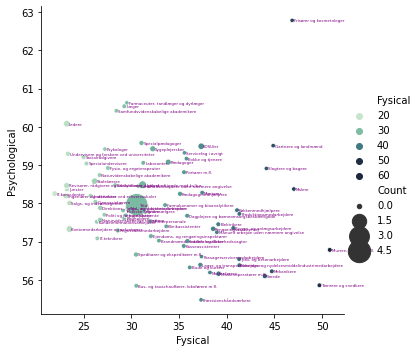

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")
#plt.figure(figsize=(60, 60))

cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
g = sns.relplot(data=dc,
                x='Fysical', 
                y='Psychological',
                hue='Fysical',
                size="Count",
                palette=cmap,
                sizes=(20, 500))

for x, y, i in zip(dc['Fysical'], dc['Psychological'], dc.index):
     plt.text(x = x+.2,
              y = y-.03,
              s = i, 
              color = 'purple',
              size=4)
g.savefig("output.png", dpi = 300)
#sns.load_dataset("planets")

In [ ]:

dc2 = df_brancher.groupby(["Group", "isPsychological"])["Score (Indekseret score)"].mean().unstack()
dc2
#sns.catplot(x=dc2.index, y=dc2.isPsychological, kind="bar", data=dc2)

In [ ]:
dc2

In [ ]:
df_brancher.isPsychological.unique()

In [ ]:
df_brancher.iloc[5000:5498]

In [ ]:
a = list(df_brancher["Topic Label"].unique())
a.sort()
a

In [ ]:
df_brancher[df_brancher["Topic Label"] == "Helbred"]

In [ ]:
df_brancher["Question Label"].unique()

### Personer

In [ ]:
df_personer = pd.read_csv("Data/arbejdsmarkedsanalyse_koen_alder.csv", sep=';', decimal=",", encoding='iso8859_10')
df_personer.head(30)